In [12]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

insurance_dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

# testing if dataset is correct
insurance_dataset.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurance_dataset_one_hot = pd.get_dummies(insurance_dataset)
insurance_dataset_one_hot.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [10]:
X = insurance_dataset_one_hot.drop("charges", axis=1)
y = insurance_dataset_one_hot["charges"]
# View features
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])



In [23]:
# training the model
history = insurance_model.fit(X_train, y_train, epochs=200, verbose=0)

In [25]:
insurance_model_loss, insurance_model_mae = insurance_model.evaluate(X_test, y_test)
insurance_model_loss, insurance_model_mae

9/9 [==============================] - 0s 1ms/step - loss: 3159.8286 - mae: 3159.8286


(3159.82861328125, 3159.82861328125)

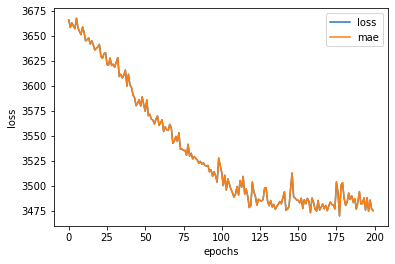

In [27]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");